<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Sentiment_Analysis_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Keras

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [3]:
import pandas as pd
df = pd.read_csv(url, sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Target feature - Liked
1. 0 - Disliked
2. 1 - Liked

### Step 2 - Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.isna().sum()

,0
Review,0
Liked,0


In [6]:
df.duplicated().sum()

np.int64(4)

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(996, 2)

### Step 3 - Preprocessing

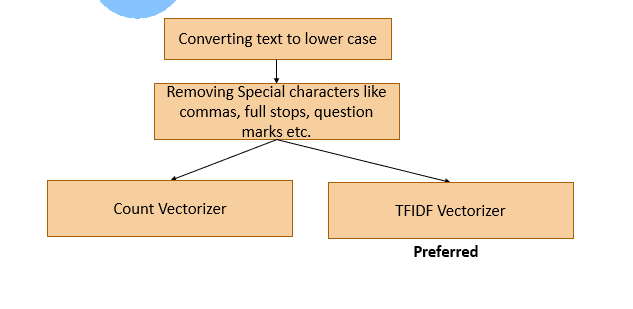

In [8]:
import re

def preprocess_text(text: str) -> str:
  # Covert string to lower case
  lower = text.lower()
  # Remove the punctuations
  no_punc = re.sub("[^a-z0-9 ]", "", lower) # Make sure provide space after ^a-z0-9
  return no_punc

In [9]:
s1 = "Wow!... Really, good Restauraunt !!!!"
print(s1)

Wow!... Really, good Restauraunt !!!!


In [10]:
preprocess_text(s1)

'wow really good restauraunt '

In [11]:
df["pre"] = df["Review"].apply(preprocess_text)

In [12]:
df.head()

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


### Seperate X and Y

In [13]:
X = df["pre"]
Y = df[["Liked"]]

In [14]:
X.head()

,pre
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


In [15]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


### Apply TFIDF Vectorized

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X_pre.shape

(996, 2067)

### Reducing number of columns Dimensionality Reduction
SVD - Singular Value Decomposition

In [19]:
from sklearn.decomposition import TruncatedSVD

In [20]:
# I want to extract 300 columns
n_components = 300

svd = TruncatedSVD(n_components)
X_pre_red = svd.fit_transform(X_pre)
X_pre_red

array([[ 1.12340987e-01,  1.78033287e-01,  2.91967496e-01, ...,
        -4.62818318e-02, -4.41139278e-02, -1.47503952e-02],
       [ 2.00839467e-01,  5.87346067e-02,  1.09893480e-01, ...,
        -1.86373609e-02, -3.58945285e-02,  1.20481822e-02],
       [ 2.48533204e-01, -5.88533080e-02, -1.03306601e-01, ...,
        -2.10595301e-02,  1.21761336e-04,  2.69569034e-02],
       ...,
       [ 2.55439310e-01,  2.11822522e-01, -2.69102783e-01, ...,
        -9.20424344e-03, -4.87877852e-03, -1.15355966e-02],
       [ 2.18125488e-01,  5.12919325e-02, -8.25595402e-02, ...,
         3.17801598e-03,  1.43245709e-02, -3.49969411e-05],
       [ 2.23653094e-01,  3.37523788e-02, -2.29951044e-02, ...,
        -3.25348524e-02, -1.75941179e-02,  2.32651115e-02]])

In [21]:
X_pre_red.shape

(996, 300)

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre_red, Y, test_size=0.2, random_state=42)

In [23]:
xtrain

array([[ 0.18927921, -0.0404883 , -0.01543488, ..., -0.02139108,
        -0.04921752,  0.01437074],
       [ 0.21913912,  0.17131221, -0.18229743, ..., -0.00054095,
        -0.01151173, -0.00831735],
       [ 0.25679083, -0.06635431,  0.09968224, ...,  0.02310572,
        -0.0153373 ,  0.03148345],
       ...,
       [ 0.0337032 , -0.00273152,  0.00977988, ...,  0.01837236,
        -0.03365398, -0.05350814],
       [ 0.16613151, -0.06999119, -0.06684643, ...,  0.01073703,
         0.01131509,  0.06159032],
       [ 0.17532897,  0.05002575,  0.01640285, ...,  0.01969305,
        -0.01469256, -0.00862151]])

In [24]:
ytrain.head()

,Liked
626,0
307,0
662,1
394,1
644,0


In [25]:
xtest

array([[ 8.61226100e-02, -2.87864023e-02, -3.12089476e-02, ...,
        -6.20838709e-03,  3.16610006e-03,  3.33369963e-03],
       [ 3.82920021e-02,  4.37543135e-04, -1.41325661e-02, ...,
        -1.91207869e-02,  2.17032402e-02,  4.10528724e-03],
       [ 1.14576640e-01,  5.20985348e-01, -4.26972396e-01, ...,
         2.95059716e-03, -1.05532499e-02,  1.58402769e-03],
       ...,
       [ 2.11511969e-01, -1.21001211e-01, -8.86616970e-03, ...,
        -2.24790525e-02, -1.20335052e-02, -1.89869211e-02],
       [ 1.51067299e-01, -5.68999340e-02, -1.61800874e-02, ...,
         1.98711438e-02, -9.39693751e-03,  7.54627582e-04],
       [ 1.19169225e-01,  1.29376992e-01, -2.43243575e-02, ...,
         9.74065353e-03, -2.34250806e-03,  4.88615946e-02]])

In [26]:
ytest.head()

,Liked
832,1
970,0
96,1
587,0
450,0


In [27]:
xtrain.shape

(796, 300)

In [28]:
xtest.shape

(200, 300)

# Build and train neural network

1. L1 Lasso - Penalty applied on absolute value of weights
2. L2 Ridge - Penalty applied on squared value of weights

In [29]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

In [30]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ]
)

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [34]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=100, callbacks=[es])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.5244 - loss: 3.0048 - val_accuracy: 0.5250 - val_loss: 2.1855
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5425 - loss: 1.9861 - val_accuracy: 0.5400 - val_loss: 1.4961
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5549 - loss: 1.3848 - val_accuracy: 0.6600 - val_loss: 1.1130
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5923 - loss: 1.0524 - val_accuracy: 0.5250 - val_loss: 0.9095
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6408 - loss: 0.8751 - val_accuracy: 0.5750 - val_loss: 0.8030
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6413 - loss: 0.7833 - val_accuracy: 0.6150 - val_loss: 0.7482
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6890 - loss: 0.7350 - val_accuracy: 0.7150 - val_loss: 0.7194
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7508 - loss: 0.7074 - val_accuracy: 0.7000 - 

## Plot learning curve

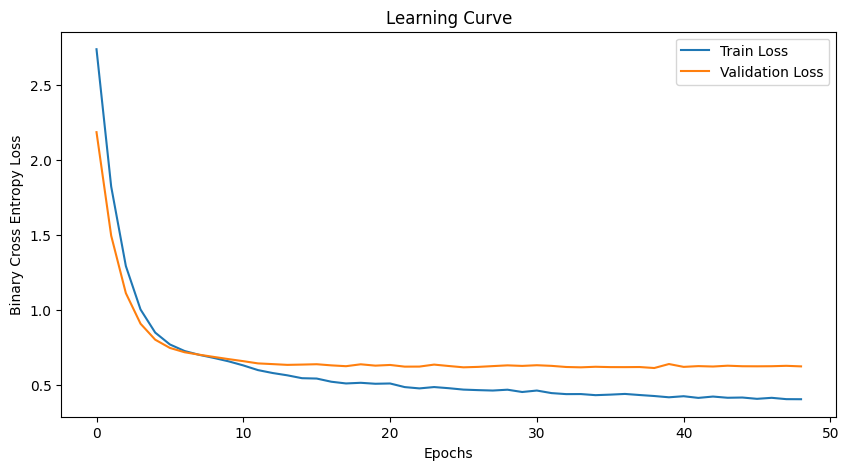

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

### With above curve it is clear that model is trained properly

# Model evaluation

In [36]:
model.evaluate(xtrain, ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9514 - loss: 0.3978


[0.39112141728401184, 0.9560301303863525]

In [37]:
model.evaluate(xtest, ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7709 - loss: 0.6266 


[0.6143392324447632, 0.7850000262260437]

### Confusion Matrix

In [38]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [39]:
yprob_train[0:5]

array([[0.11620744],
       [0.26677677],
       [0.9000372 ],
       [0.95596105],
       [0.34547043]], dtype=float32)

In [40]:
ypred_train = [1 if prob >= 0.5 else 0  for prob in yprob_train]
ypred_test = [1 if prob >= 0.5 else 0  for prob in yprob_test]

In [41]:
ypred_train[0:5]

[0, 0, 1, 1, 0]

In [42]:
ytrain.head()

,Liked
626,0
307,0
662,1
394,1
644,0


In [43]:
ypred_test[0:5]

[1, 0, 0, 0, 0]

In [44]:
ytest[0:5]

,Liked
832,1
970,0
96,1
587,0
450,0


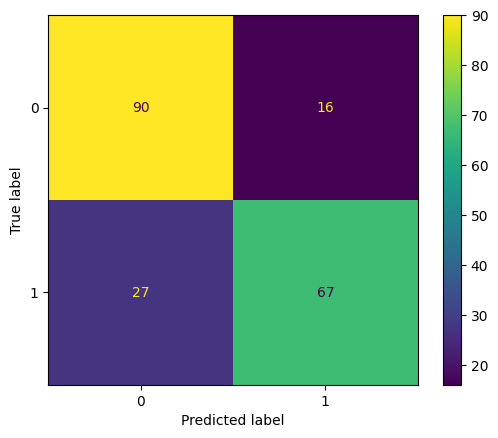

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       106
           1       0.81      0.71      0.76        94

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



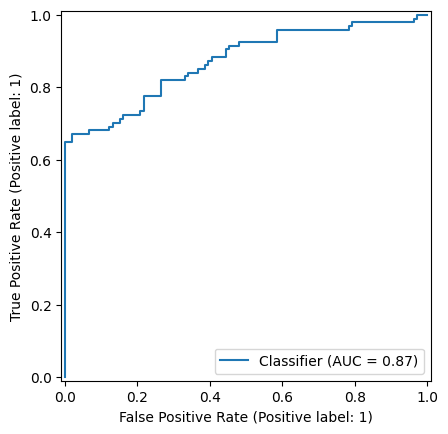

In [47]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, yprob_test)

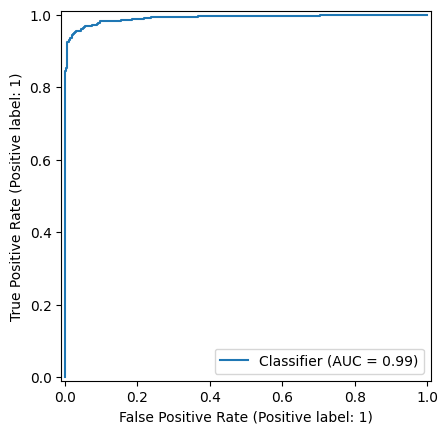

In [48]:
RocCurveDisplay.from_predictions(ytrain, yprob_train)

### From above results it is clear that this model is a good model

### Out of Sample prediction

In [49]:
def predict_sentiment(text: str) -> dict:
  pre1 = preprocess_text(text)
  pre2 = tfidf.transform([pre1]).toarray()
  pre_red = svd.transform(pre2)
  prob = model.predict(pre_red)
  pred = 1 if prob >= 0.5 else 0
  return {
      "Prediction": pred,
      "Probability": prob.round(4)
  }

In [50]:
predict_sentiment("Wow! Really liked the place and its ambience ...")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


{'Prediction': 1, 'Probability': array([[0.9301]], dtype=float32)}

In [51]:
predict_sentiment("Really Slow service, did not like the taste of Paste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


{'Prediction': 0, 'Probability': array([[0.0527]], dtype=float32)}

In [52]:
predict_sentiment("The service was fast and amazing!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


{'Prediction': 1, 'Probability': array([[0.9583]], dtype=float32)}

In [53]:
predict_sentiment("Bad quality food! Pathetic Service!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


{'Prediction': 0, 'Probability': array([[0.045]], dtype=float32)}

### Save the model with preprocesors

In [54]:
tfidf

TfidfVectorizer()

In [55]:
svd

TruncatedSVD(n_components=300)

In [56]:
model

<Sequential name=sequential, built=True>

In [57]:
import joblib
joblib.dump(tfidf, "tfidf.joblib")
joblib.dump(svd, "svd.joblib")

['svd.joblib']

In [58]:
model.save("sentiment_model.keras")

### Loading the objects from file

In [59]:
t = joblib.load("tfidf.joblib")
t

TfidfVectorizer()

In [60]:
s = joblib.load("svd.joblib")
s

TruncatedSVD(n_components=300)

In [61]:
from keras.models import load_model

In [62]:
m = load_model("sentiment_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)